#Step 2: Dataset transaction.csv per la catena di negozi 21#

In [2]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
#Importo il file parqet
import pyarrow.parquet as pq
df = pq.read_table("/content/drive/MyDrive/Lavoro Bitbang/total_df.parquet").to_pandas()

In [8]:
#Controllo se ci sono missing
df.isnull().sum()

id                       0
chain                    0
dept                     0
category                 0
company                  0
brand                    0
date                     0
productsize              0
productmeasure      354184
purchasequantity         0
purchaseamount           0
dtype: int64

In [9]:
#la variabile productmeasure ha 354184 valori nulli, per il resto le altre variabili sono ok

In [10]:
df.describe()

,id,chain,dept,category,company,brand,productsize,purchasequantity,purchaseamount
count,4.107479e+07,41074793.0,4.107479e+07,4.107479e+07,4.107479e+07,4.107479e+07,4.107479e+07,4.107479e+07,4.107479e+07
mean,8.060958e+08,21.0,3.967097e+01,3.981269e+03,2.221146e+08,1.613183e+04,2.944661e+01,1.458630e+00,3.939110e+00
std,8.023215e+08,0.0,2.721958e+01,2.724836e+03,4.718128e+08,1.489871e+04,5.555438e+01,1.338027e+00,4.008749e+00
min,2.241898e+08,21.0,0.000000e+00,0.000000e+00,1.000000e+04,0.000000e+00,0.000000e+00,-6.300000e+01,-9.907200e+02
25%,4.966884e+08,21.0,1.800000e+01,1.827000e+03,1.033600e+08,7.368000e+03,8.000000e+00,1.000000e+00,2.000000e+00
50%,4.986422e+08,21.0,3.500000e+01,3.506000e+03,1.041190e+08,1.476000e+04,1.450000e+01,1.000000e+00,2.990000e+00
75%,5.617786e+08,21.0,5.800000e+01,5.812000e+03,1.071692e+08,1.782300e+04,2.550000e+01,2.000000e+00,4.590000e+00
max,4.727487e+09,21.0,9.900000e+01,9.999000e+03,1.099996e+10,1.085970e+05,3.000000e+03,4.090000e+02,7.000000e+03


In [ ]:
#Le righe sono ok, hanno tutte valore chain 21 e gli id sono completi 41074793 

In [ ]:
#df2=df.head(5)
#df2.to_latex("/content/drive/MyDrive/Colab Notebooks/df2.latex")


In [ ]:
#df2

In [ ]:
#Controllo il range di date e il loro numero
len(df['date'].unique())

512

In [ ]:
df['date'].max(), df['date'].min()

('2013-07-26', '2012-03-02')

In [ ]:
#Le date sono complete 512, e vanno da 2 marzo 2012 al 26 luglio 2013

In [ ]:
#Rimuovo la colonna chain
df.drop(columns=['chain'],inplace=True)
df.head()

,id,dept,category,company,brand,date,productsize,productmeasure,purchasequantity,purchaseamount
349238418,4643971643,7,709,102550020,6550,2013-03-08,6.0,OZ,1,9.99
349238419,4643971643,36,3618,104900040,23359,2013-03-08,144.0,OZ,2,10.00
349238420,4643971643,51,5121,105150050,16728,2013-03-08,20.0,OZ,1,6.99
349238421,4643971643,54,5401,103800030,5618,2013-03-08,29.6,OZ,1,4.99
349238422,4643971643,1,105,1030008737,5794,2013-03-08,48.0,OZ,1,16.99


In [ ]:
#df['Year'] = df['date'].str[0:4]

In [ ]:
#df['Month'] = df['date'].str[5:7]

In [ ]:
df.head()

,id,dept,category,company,brand,date,productsize,productmeasure,purchasequantity,purchaseamount
349238418,4643971643,7,709,102550020,6550,2013-03-08,6.0,OZ,1,9.99
349238419,4643971643,36,3618,104900040,23359,2013-03-08,144.0,OZ,2,10.00
349238420,4643971643,51,5121,105150050,16728,2013-03-08,20.0,OZ,1,6.99
349238421,4643971643,54,5401,103800030,5618,2013-03-08,29.6,OZ,1,4.99
349238422,4643971643,1,105,1030008737,5794,2013-03-08,48.0,OZ,1,16.99


**Numero di consumatori**

In [ ]:
len(df['id'].unique())

32640

In [ ]:
#Ho sotto mano 32640 consumatori su una popolazione totale di 311541 che sarebbe il 10,47%
#Non ho adottato un criterio di campionamento casuale ma ho filtrato i dati in base alle catena 
# 21 che risulta quella con più transazioni collegate

**Transazioni**

In [ ]:
#Numero transazioni per cliente
df_chain = df.groupby(['id'])['purchaseamount'].count().reset_index()
df_chain.columns = ['id', 'n_transaction']


In [ ]:
df_chain

,id,n_transaction
0,224189756,498
1,241761510,440
2,241775362,994
3,241777844,1885
4,241915779,758
...,...,...
32635,4679690435,155
32636,4679693652,80
32637,4684860130,95
32638,4690463985,254


In [ ]:
df_chain.sort_values('n_transaction',ascending= False)

,id,n_transaction
5648,496197822,105448
22819,560161366,22657
21938,557841560,7036
27686,1830481116,6839
15543,499010999,6375
...,...,...
27356,1725509579,34
20238,501753549,28
31727,3696083120,24
31042,3393998897,22


In [ ]:
import plotly.express as px
fig = px.histogram(df_chain, x=df_chain["n_transaction"],range_x=(0,3400),width=800, height=400)
fig.update_xaxes(title_text='Numero di transazioni per cliente')
fig.update_yaxes(title_text='Numero di clienti')
fig.show()

In [ ]:
df_chain['n_transaction'].describe()

count     32640.000000
mean       1258.418903
std         915.122021
min          20.000000
25%         741.000000
50%        1138.000000
75%        1639.250000
max      105448.000000
Name: n_transaction, dtype: float64

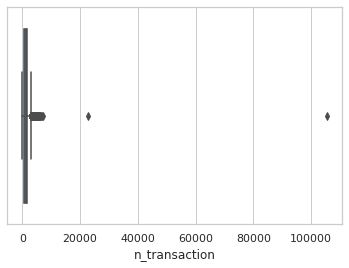

In [ ]:
#Cerco gli outliers
import seaborn as sns
sns.set_theme(style="whitegrid")
ax = sns.boxplot(x=df_chain['n_transaction'])

In [ ]:
#Provare a eliminare 2 outlier e poi il 99o percentile

In [ ]:
df_chain['n_transaction'].quantile(0.99)

3353.0

In [ ]:
df_out = df_chain.groupby('id')['n_transaction'].sum().reset_index()
df_out.columns = ['id', 'n_transaction']

df_out = df_out[df_out['n_transaction']>df_out['n_transaction'].quantile(0.99)]

In [ ]:
len(df_out['id'].unique())

326

In [ ]:
df_out.describe()

,id,n_transaction
count,3.260000e+02,326.000000
mean,6.339105e+08,4254.806748
std,5.208491e+08,5745.559466
min,4.948135e+08,3355.000000
25%,4.965595e+08,3520.250000
50%,4.977806e+08,3721.000000
75%,5.571647e+08,4071.000000
max,3.719234e+09,105448.000000


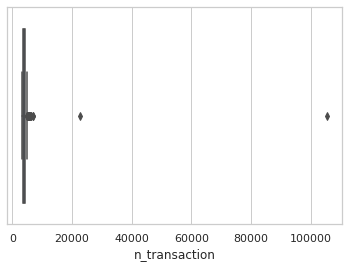

In [ ]:
sns.set_theme(style="whitegrid")
ax = sns.boxplot(x=df_out['n_transaction'])

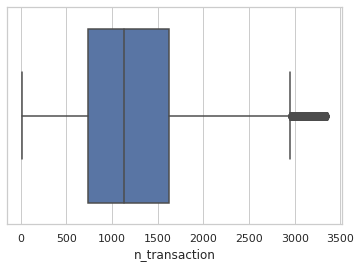

In [ ]:
df_in = df_chain[df_chain['n_transaction']<df_chain['n_transaction'].quantile(0.99)]

sns.set_theme(style="whitegrid")
ax = sns.boxplot(x=df_in['n_transaction']) #Contare outlier

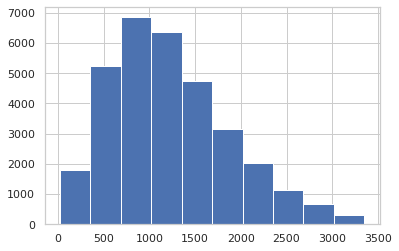

In [ ]:
df_in['n_transaction'].hist()

In [ ]:
df_chain.describe([x*0.1 for x in range(10)])

,id,n_transaction
count,3.264000e+04,32640.000000
mean,8.928239e+08,1258.418903
std,9.180302e+08,915.122021
min,2.241898e+08,20.000000
0%,2.241898e+08,20.000000
10%,4.956361e+08,463.000000
20%,4.964298e+08,659.000000
30%,4.972584e+08,822.000000
40%,4.979370e+08,976.000000
50%,4.997627e+08,1138.000000


In [ ]:
df_in.describe([x*0.1 for x in range(10)])

,id,n_transaction
count,3.231200e+04,32312.000000
mean,8.954564e+08,1228.058307
std,9.208236e+08,649.710871
min,2.241898e+08,20.000000
0%,2.241898e+08,20.000000
10%,4.956374e+08,460.000000
20%,4.964313e+08,656.000000
30%,4.972667e+08,817.000000
40%,4.979439e+08,971.000000
50%,4.997867e+08,1131.000000


In [ ]:
#Il numero di transazioni per id cliente varia tra 20 e 105448 Ma la maggior parte (tra il 10o e 90o percentile)
#è compresa tra 463 e 2200. La presenza di valori estremi indica che ho a
#che fare con degli outlier anche se la media e la mediana non sono tanto distanti
# bisogna tenere d'occhio gli id 496197822 e 560161366

In [ ]:
#Se elimino il 99o percentile posso osservare come la distribuzone sia più omogenea e restino solo pochi outlier in alto

In [ ]:
#Valore singole transazioni > Stesso di numero transazioni
df['purchaseamount'].describe([x*0.1 for x in range(10)])

count    4.107479e+07
mean     3.939110e+00
std      4.008749e+00
min     -9.907200e+02
0%      -9.907200e+02
10%      1.390000e+00
20%      1.990000e+00
30%      2.290000e+00
40%      2.690000e+00
50%      2.990000e+00
60%      3.500000e+00
70%      4.000000e+00
80%      5.000000e+00
90%      7.030000e+00
max      7.000000e+03
Name: purchaseamount, dtype: float64

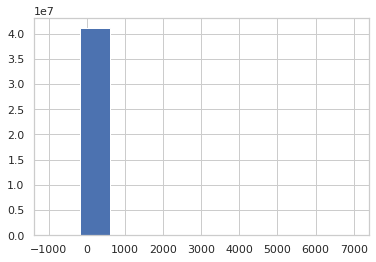

In [ ]:
df['purchaseamount'].hist()

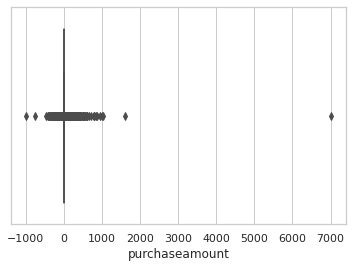

In [ ]:
sns.set_theme(style="whitegrid")
ax = sns.boxplot(x=df['purchaseamount'])

In [ ]:
#Anche il valore delle singole vendite oscilla tra 1,39 e 7.03 tra il decimo e il novantesimo percentile ma sono presenti dei valori estremi che, in questo caso
#influiscono sulla media

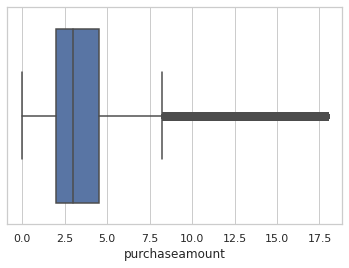

In [ ]:
#Anche in questo caso provo a rimuovere il 99o quantile per osservare meglio la distribuzione
cap=df['purchaseamount'].quantile(0.99)
floor=df['purchaseamount'].quantile(0.01)
df_cap= df[(df['purchaseamount']<cap) & (df['purchaseamount']>floor)]
sns.set_theme(style="whitegrid")
ax = sns.boxplot(x=df_cap['purchaseamount'])

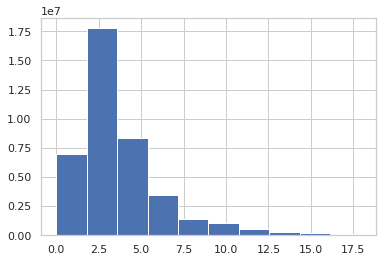

In [ ]:
df_cap['purchaseamount'].hist()

In [ ]:
fig = px.histogram(df_cap, x=df_cap["purchaseamount"],width=800, height=400)
fig.update_xaxes(title_text='Valore delle singole transazioni in $')
fig.update_yaxes(title_text='Numero di transazioni')
fig.show()

In [ ]:
df_cap['purchaseamount'].describe([x*0.1 for x in range(10)])

count    4.018041e+07
mean     3.774540e+00
std      2.560522e+00
min      1.000000e-02
0%       1.000000e-02
10%      1.490000e+00
20%      1.990000e+00
30%      2.350000e+00
40%      2.690000e+00
50%      2.990000e+00
60%      3.500000e+00
70%      4.000000e+00
80%      5.000000e+00
90%      6.990000e+00
max      1.793000e+01
Name: purchaseamount, dtype: float64

In [ ]:
#Dopo aver rimosso il 1o e il 99o percentile  posso ossevare meglio la distribuzione delle singole transazioni: esse sono 
#cmprese tra 0 e 17 $ di valore con la maggior parte tra 20o e 80o percentile compresa tra 1.99 e 5

In [ ]:
#Controllo la distribuzione giornaliera delle vendite
df['date'] = pd.to_datetime(df['date'])
df_day = df.groupby('date').agg({'purchaseamount': 'sum'}).reset_index()
df_day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 512 entries, 0 to 511
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   date            512 non-null    datetime64[ns]
 1   purchaseamount  512 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 8.1 KB


In [ ]:
len(df_day['date'].unique())

512

In [ ]:
df_day

,date,purchaseamount
0,2012-03-02,403530.52
1,2012-03-03,454403.38
2,2012-03-04,544299.68
3,2012-03-05,311873.32
4,2012-03-06,287108.06
...,...,...
507,2013-07-22,4669.07
508,2013-07-23,4502.89
509,2013-07-24,146.77
510,2013-07-25,55.42


In [ ]:
# Creo il grafico
import plotly.graph_objects as go

fig = go.Figure()
fig.add_trace(go.Scatter(
    x=df_day['date'],
    y=df_day['purchaseamount'],
    mode="lines"
))
fig.update_layout(title_text="Serie della spesa giornaliera in $")
#fig = go.Figure(data=plot_data, layout=plot_layout)
#fig.update_xaxes(
#    ticktext=["Marzo2012", "Giugno2012", "Settembre2012", "Dicembre2012","Marzo2013", "Giugno2013","Luglio2013"],
#    tickvals=["2012-03-02", "2012-06-02", "2012-09-02","2012-12-02", "2013-03-02","2013-06-02","2013-06-02","2013-07-02"],
#)

fig.show()




In [ ]:
#Come si può osservare dalla serie storica delle vendite per data abbiamo un trend costante delle transazioni con oscillazioni
#molto più marcate da novembre 2012 in poi  e con un calo brusco da aprile 2013 in poi dovuto, probabilmente alla mancanza di dati
#Sul minimo c'è un giorno di festa o un missing

In [ ]:
df_day.describe([x*0.1 for x in range(10)])

,purchaseamount
count,512.000000
mean,316011.948867
std,168333.488648
min,5.180000
0%,5.180000
10%,37670.685000
20%,159904.366000
30%,289019.743000
40%,313011.874000
50%,338143.460000


In [ ]:
#Per quanto riguarda la spesa giornaliera notiamo degli outilier in basso, che vuol dire che alcuni giorni hanno poche transazioni, questo probabilmente è
#dovuto al fatto che gli ultimi mesi del 2013 hanno pochi dati 

In [ ]:
#Plottare dic 2012 e individuare giorno 0 anche a livello di data frame

In [ ]:
df_day.columns= ['date', 'purchaseamount']


In [ ]:
df_day

,date,purchaseamount
0,2012-03-02,403530.52
1,2012-03-03,454403.38
2,2012-03-04,544299.68
3,2012-03-05,311873.32
4,2012-03-06,287108.06
...,...,...
507,2013-07-22,4669.07
508,2013-07-23,4502.89
509,2013-07-24,146.77
510,2013-07-25,55.42


In [ ]:
from datetime import datetime, timedelta, date
df_dic = df_day[(df_day['date'] <= pd.to_datetime('2012-12-31')) & (df_day['date'] >=pd.to_datetime('2012-12-1'))].reset_index(drop=True)

df_dic


,date,purchaseamount
0,2012-12-01,480936.310000
1,2012-12-02,636849.310000
2,2012-12-03,345672.430000
3,2012-12-04,312045.490000
4,2012-12-05,377422.550000
5,2012-12-06,376966.580000
6,2012-12-07,415142.090000
7,2012-12-08,512015.680000
8,2012-12-09,619186.890000
9,2012-12-10,353919.190000


In [ ]:
#Effetto giorno di natale

In [ ]:
#Spesa per consumatore > Stesso servizio con outlier
df_spesa = df.groupby('id').agg({'purchaseamount': 'sum'})

In [ ]:
df_spesa.describe([x*0.1 for x in range(10)])

,purchaseamount
count,32640.000000
mean,4957.050178
std,4267.153459
min,-5953.670000
0%,-5953.670000
10%,1787.317000
20%,2537.114000
30%,3184.646000
40%,3803.556000
50%,4453.330000


In [ ]:
df_spesa[df_spesa['purchaseamount']<0]

,purchaseamount
id,
497610669,-5953.67


In [ ]:
df_spesa['purchaseamount'].sort_values(ascending=False)

id
496197822     569777.77
560161366      98304.74
557841560      42283.38
575326083      42151.43
499010999      39627.00
                ...    
1725509579       126.82
2718027366       124.22
2237486513        96.03
3393998897        60.21
497610669      -5953.67
Name: purchaseamount, Length: 32640, dtype: float64

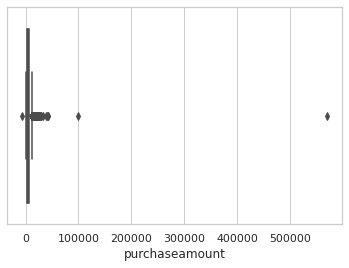

In [ ]:
sns.set_theme(style="whitegrid")
ax = sns.boxplot(x=df_spesa['purchaseamount'])

In [ ]:
#La spesa totale per id ha anch'essa problemi agli estrmei: nell'estremo inferiore abbiamo valori negativi che indicano storni, nell'estremo superiore
#abbiamo un massimo di 569777.77 che dobbiamo indagare

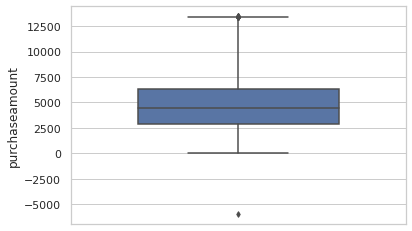

In [ ]:
df_in2 = df_spesa[df_spesa['purchaseamount']<df_spesa['purchaseamount'].quantile(0.99)]
sns.set_theme(style="whitegrid")
ax = sns.boxplot(y=df_in2['purchaseamount'],orient='v',whis=2,width=0.6,fliersize=4)

In [ ]:
fig = px.histogram(df_in2, x=df_in2["purchaseamount"],width=800, height=400)
fig.update_xaxes(title_text='Valore totale della spesa in $ per cliente')
fig.update_yaxes(title_text='Numero di clienti')
fig.show()

In [ ]:
fig = px.histogram(df, x=df["purchaseamount"],width=800, height=400)
fig.update_xaxes(title_text='Valore totale della spesa in $ per cliente')
fig.update_yaxes(title_text='Numero di clienti')
fig.show()

In [ ]:
df_all= pd.merge(df_chain, df_spesa, on='id')

In [ ]:
df_all=df_all[['n_transaction','purchaseamount']].describe()
df_all.to_latex("/content/drive/MyDrive/Colab Notebooks/df_all.latex")


In [ ]:
#E' lo stesso id che risulta avere un numero di transazioni outlier: 105448 bisogna capire cosa fare con l'id 496197822

**Analisi delle altre variabili**

In [ ]:
#Dipartimenti(categorie di prodotto)
len(df['dept'].unique())

In [ ]:
df['dept'].max(), df['dept'].min()

In [ ]:
df_dept = df.groupby(['dept'])['purchaseamount'].sum().reset_index()

In [ ]:
df_dept['purchaseamount'].describe([x*0.1 for x in range(10)])

In [ ]:
df_dept.plot.box() #rimuovere dept

In [ ]:
df_dept.sort_values('purchaseamount')

In [ ]:
#Le vendite per dipartimento hanno un valore compreso tra 0 e circa 13 milioni ma il 90% della distribuzione è compreso 
#tra 145023 e 5432729 dollari

In [ ]:
#Company
len(df['company'].unique())

In [ ]:
#Ci sono 8287 compagnie 

In [ ]:
df_comp = df.groupby(['company'])['purchaseamount'].sum().reset_index()

In [ ]:
df_comp.describe([x*0.1 for x in range(10)])

In [ ]:
df_comp['purchaseamount'].plot.box()

In [ ]:
df_comp

In [ ]:
df1 = df[['id','date','purchaseamount']]

In [ ]:
df1.head()

**Conversione in formato .parquet**

In [ ]:
#df1['anno_mese'] = df1.apply(lambda x: x['date'][0:4] + '_' + x['date'][5:7], axis=1 )
#df1.head()

In [ ]:
#df1.to_parquet("/content/drive/MyDrive/Colab Notebooks/rfm.parquet")